<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S4_2_Reconna%C3%AEtre_des_visages_avec_SVM_Exercice_SOLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconnaître des visages avec SVM

SVM est un algorithme assez puissant pour faire de la classification. Bien qu'on puisse l'utiliser sur des datasets classiques, tentons de regarder comment on pourrait faire de la reconnaissance de visages connus avec l'algorithme. 

0. Importez les librairies usuelles 

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

1. Dans ```sklearn.datasets``` importez ```fetch_lfw_people```

Mettez ces données dans un DataFrame 

In [0]:
from sklearn.datasets import fetch_lfw_people 
faces = fetch_lfw_people(min_faces_per_person=60)

In [0]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

2. Regardez la variables ```target_names```

In [0]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


3. Regardez la ```shape``` des images 

In [0]:
print(faces.images.shape)

(1348, 62, 47)


In [0]:
62*47

2914

---> Nous obtenons une np.array en trois dimension. La première dimension représente le nombre d'images  la seconde la hauteur de l'image, le nombre de pixel par colonne, la troisième dimension représente la largeur de l'image, le nombre de pixels sur une ligne, et la dernière représente les couleurs de chaque pixel. 


4. Dans matplotlib, vous avez une méthode qui s'appelle ```imshow()``` qui vous permet de voir une image. Essayez d'utiliser cette méthode pour visualiser une image de votre dataset 

Text(0.5, 0, 'George W Bush')

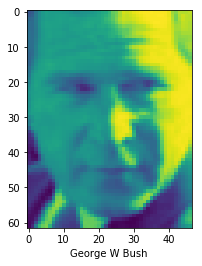

In [0]:
 plt.imshow(faces.images[7])

plt.xlabel(faces.target_names[faces.target[7]])

5. Tentez maintenant de regarder les 15 premières images en utilisant une boucle

Pour cela, regardez la documentation de :

1. [enumerate()](http://book.pythontips.com/en/latest/enumerate.html)
2. [plt.subplots()](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)
3. [ax.flat](https://stackoverflow.com/questions/46862861/what-does-axes-flat-in-matplotlib-do)


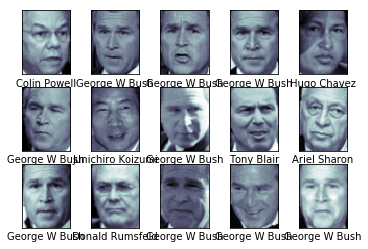

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])

5. Importez Support Vector Machine de Sklearn et instanciez votre modèle 

In [0]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', class_weight='balanced')

6. Splittez vos données en train et en test 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
                                                    faces.target,
                                                    test_size = 0.3,
                                                    random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

7. Fittez votre données de train et regardez votre score

In [0]:
%time svm.fit(X_train, y_train)

CPU times: user 5.23 s, sys: 4.5 ms, total: 5.23 s
Wall time: 5.25 s


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
%time svm.score(X_test, y_test)

CPU times: user 1.25 s, sys: 2.05 ms, total: 1.26 s
Wall time: 1.26 s


0.7555555555555555

8. Notre score n'est pas incroyable, nous avons peut être fait une erreur dans l'instanciation de notre SVM. Faites une GridSearch pour voir quel modèle serait optimum 

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(svm, param_grid, verbose=2, n_jobs=-1)
grid

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [0]:
%time grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.5min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 3.37 s, sys: 42.7 ms, total: 3.42 s
Wall time: 1min 36s


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [0]:
print(grid.best_params_)

{'C': 50, 'gamma': 0.0001}


In [0]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.8271604938271605

9. Notre score s'améliore mais, on peut encore faire mieux. Nous allons commencer quelque chose que nous allons voir plus en détail dans les prochains cours : PCA 

Le principe de PCA est de combiner les variables dans un modèle pour garder uniquement les éléments les plus explicatifs. 

Dans sklearn import PCA via le code suivant : 

```
from sklearn.decomposition import PCA
```

Vous instancierez cette classe de la façon suivante : 

```
pca = PCA(n_components=0.99, whiten=True, random_state=42)
```

In [0]:
  from sklearn.decomposition import PCA
pca =PCA(n_components=0.95, random_state=42)

10. Faites un ```fit_transform``` sur vos données ```X_train``` & ```X_test```

In [0]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape

(943, 150)

---> Ici, nous avons pris uniquement 0.99 

In [0]:
pca.components_
pca.explained_variance_
pca.explained_variance_ratio_.sum()

0.95028746

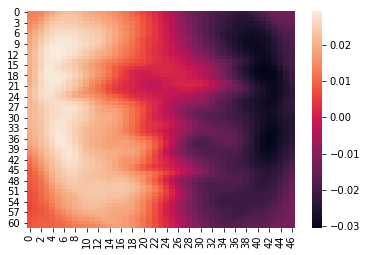

In [0]:
pc1 = pca.components_[1].reshape(62,47)
import seaborn as sns
sns.heatmap(pc1)

10. Refaites une GridSarch avec les nouvelles données 

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(svm, param_grid, verbose=1)

In [0]:
grid.fit(X_train_pca, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   10.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

11. Regardez votre score à nouveau 

In [0]:
grid.best_estimator_.score(X_test_pca, y_test)

0.8148148148148148

In [0]:
grid.best_params_

{'C': 10, 'gamma': 0.0001}

12. Créez une variable ```y_pred``` qui contiendra les predictions pour ```X_test_pca```

In [0]:
y_pred = grid.best_estimator_.predict(X_test_pca)

13. Regardez vos résultats sur une matrice de confusion 

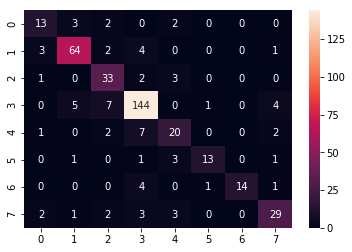

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

14. Tentons de regarder quelques images avec les prédictions que nous avons faites. De la même manière que nous l'avions fait au début de l'exercice, visualisez des images avec leurs prédictions. 

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

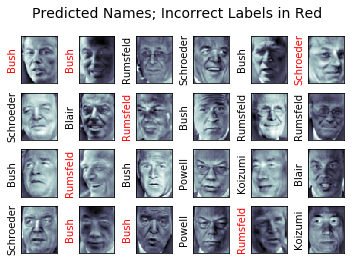

In [0]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1],
                   color='black' if y_pred[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)